In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [ ]:
# importing a simple regression dataset
X,y = make_regression(
    n_samples = 15,
    n_features = 1,
    n_informative = 1,
    n_targets = 1,
    noise=10,
    random_state = 83
)

In [ ]:
X[:5]

array([[-1.08056649],
       [ 0.09447164],
       [-1.12274722],
       [-1.03965701],
       [ 1.42993841]])

In [ ]:
y[:5]

array([-47.3975475 ,   0.5839787 , -51.65592031, -56.30543186,
        69.42631394])

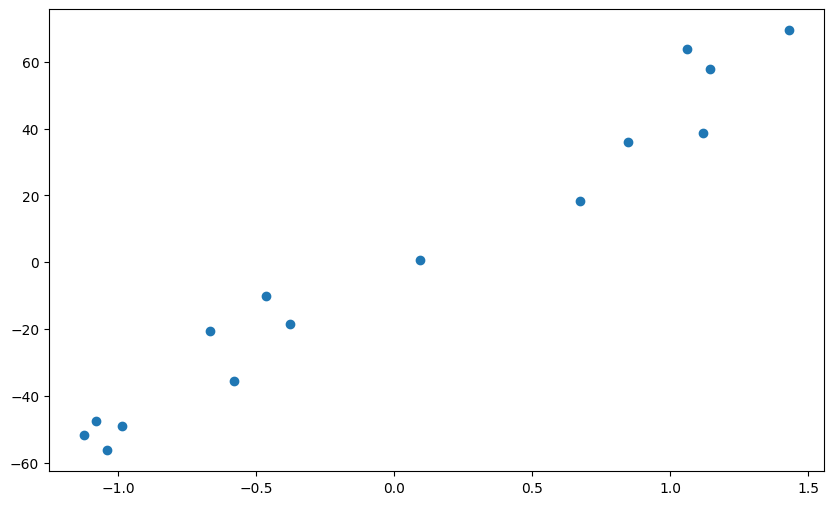

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

In [ ]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [ ]:
print(f'm = {lreg.coef_}')
print(f'b = {lreg.intercept_}')

m = [46.42197217]
b = -0.4935883537411853


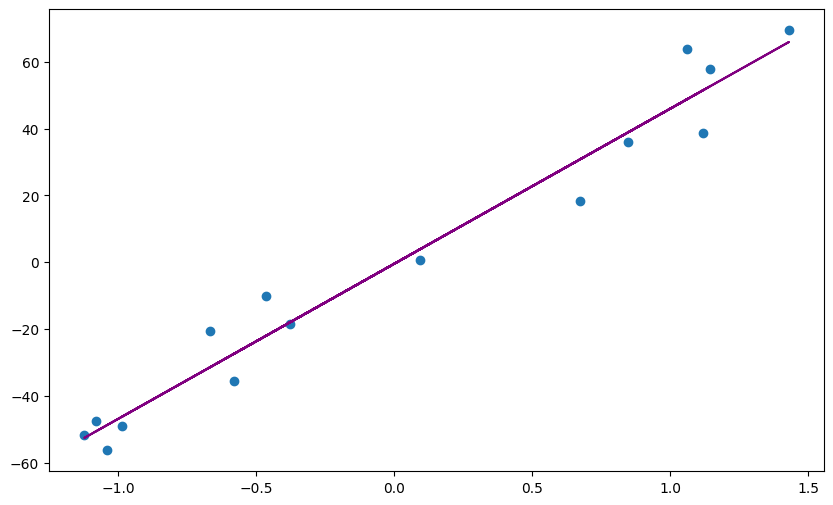

In [ ]:
m = lreg.coef_ #coef_ return all the weights found by sklearn's linear regression model
b = lreg.intercept_ #intercept_ return the bias value
y_pred = lreg.predict(X)
#print(y_pred)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple')
plt.show()

As we consider m is known at first we take m = [46.42197217] and try to find the correct value of b by using GD Algorithm

[-20.16202743  34.38555982 -22.12014006 -18.26292864  96.38056112
   8.42182629 -15.70261332  79.28954936   3.15734218  83.06424579
  -0.88841605  61.33371642  81.88005502  69.42677916  12.49108965]


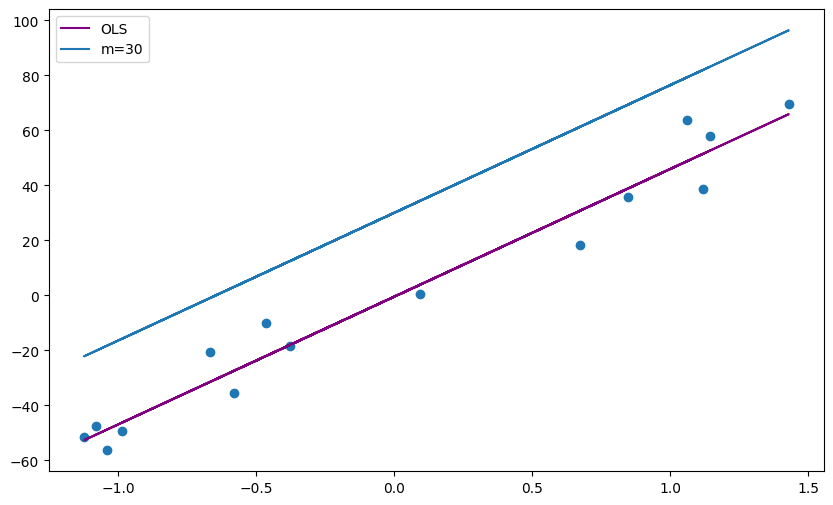

In [ ]:
m = 46.42197217
b = 30 # Take a random value
y_pred_new = (m*X.ravel()+b) # prediction for the value
print(y_pred_new)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS') # Actual line from sklearn
plt.plot(X,y_pred_new, label='m=30')# our models predicted line
plt.legend()
plt.show()

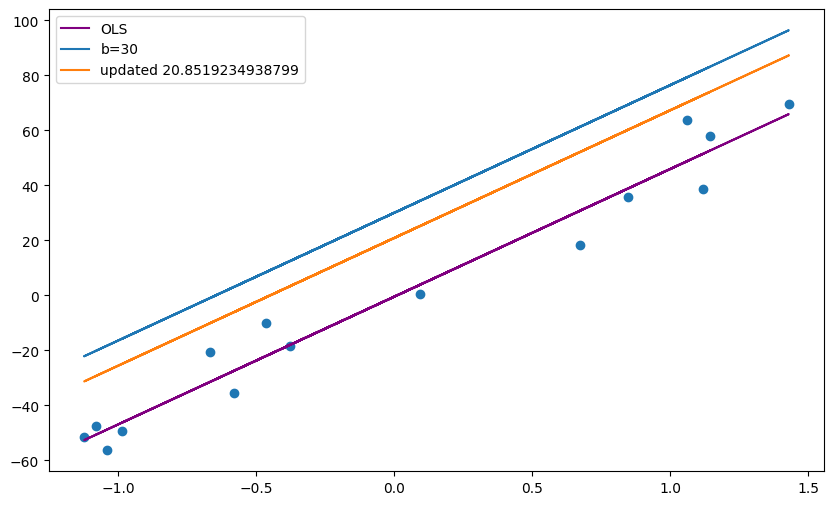

In [ ]:
lr = 0.01
#slope = -2*np.sum(y-m*X-b)
slope = -2*np.sum(y-m*X.ravel()-b)
b = b - lr*slope

y_pred_newest = m*X+b

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS')
plt.plot(X,y_pred_new, label='b=30')
plt.plot(X,y_pred_newest, label=f'updated {b}')
plt.legend()
plt.show()

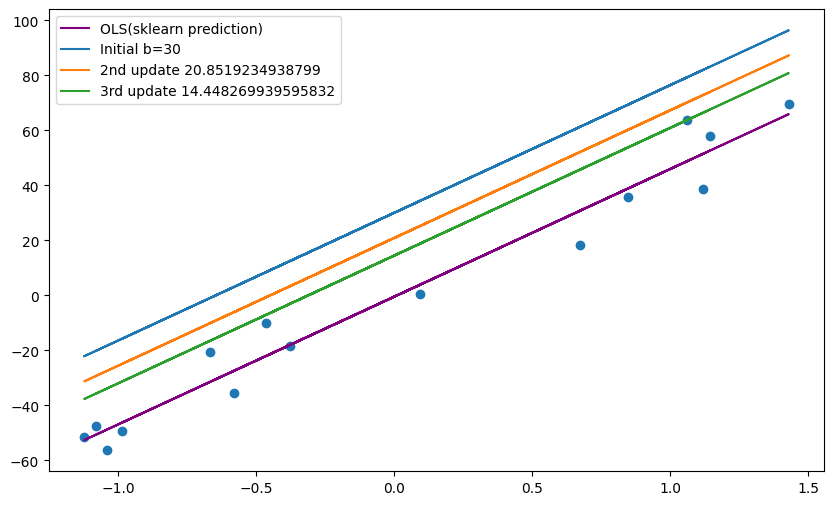

In [ ]:
lr = 0.01
#slope = -2*np.sum(y-m*X-b)
slope = -2*np.sum(y-m*X.ravel()-b)
b_last = b - lr*slope

y_pred_newest_last = m*X+b_last

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS(sklearn prediction)')
plt.plot(X,y_pred_new, label='Initial b=30')
plt.plot(X,y_pred_newest, label=f'2nd update {b}')
plt.plot(X,y_pred_newest_last, label=f'3rd update {b_last}')
plt.legend()
plt.show()

Visualize how the loss look like and how GD performing for minimizing the loss

In [ ]:
all_b = np.arange(-20,20,0.5) #random values of b from -20 to 20
loss = [] # it will store the losses for every b,loss is a list
for b in all_b:
  loss.append(np.power(np.sum(y-m*X.ravel()-b),2)) # I use OLS here (y-y_hat)^2 or (y-mx-b)^2

In [ ]:
loss = np.array(loss) # converting loss list to numpy array to plot

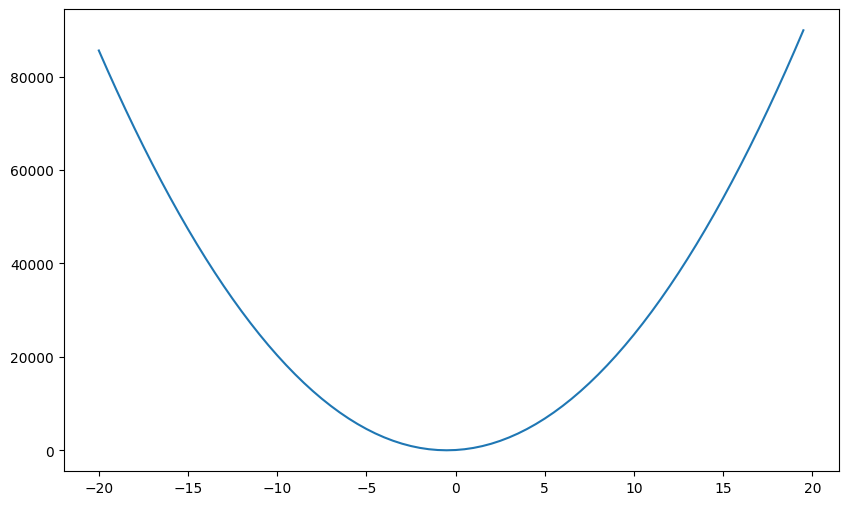

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(all_b,loss)
plt.show()

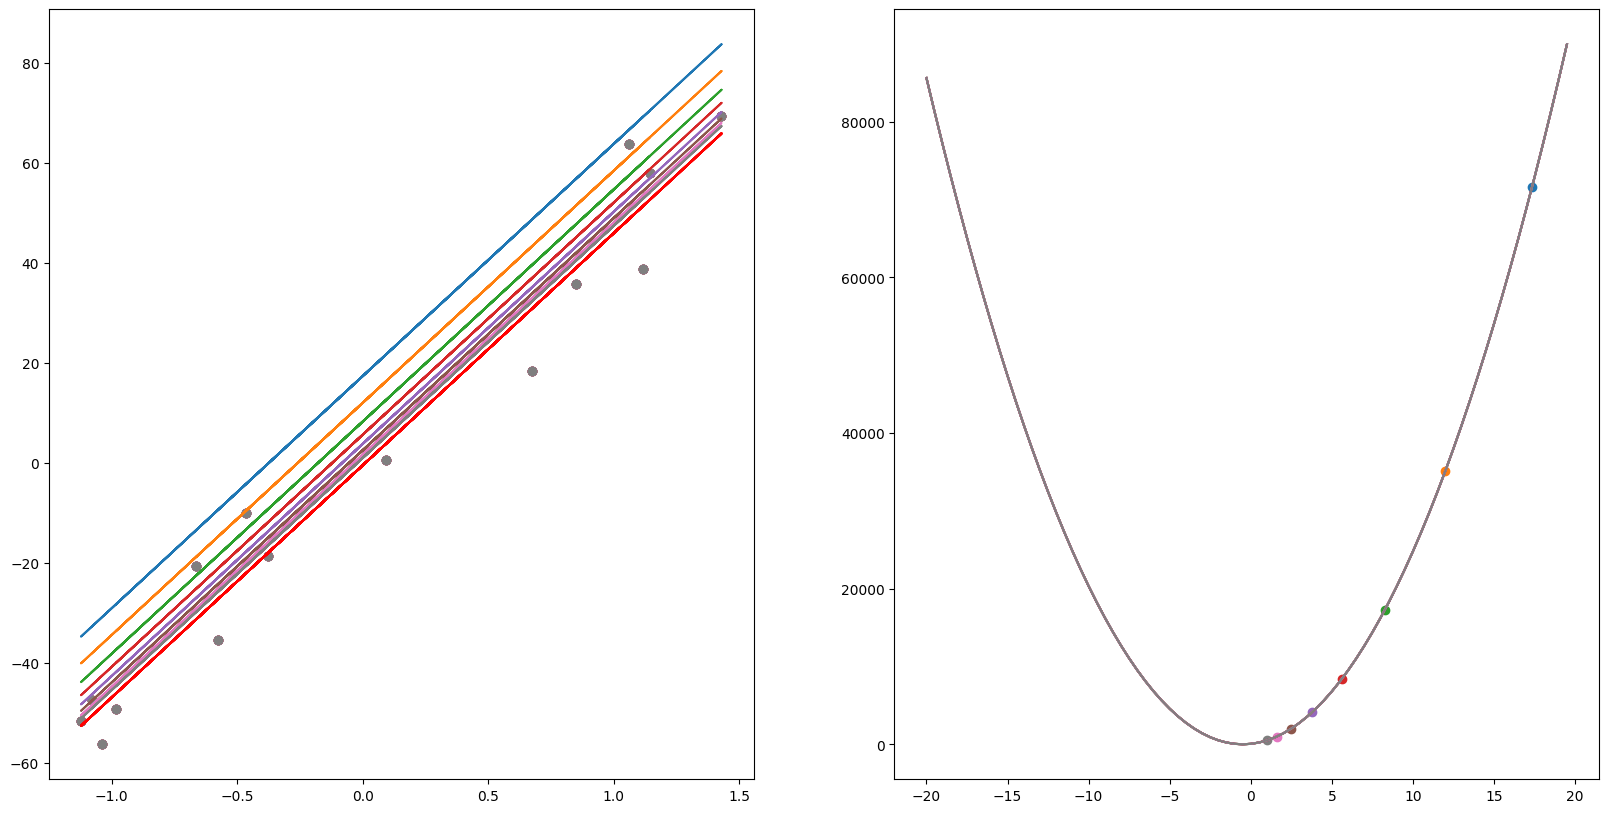

In [ ]:
m = lreg.coef_   # lr.coef_  from above algorithm
b = 25
lrate = 0.01
slope = -2*np.sum(y-m*X.ravel()-b)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))


for i in range(8):
    slope = -2*np.sum(y-m*X.ravel()-b)
    b = b - lrate*slope
    l = np.power(np.sum(y-m*X.ravel()-b),2) # loss
    y_pred_newest = m*X.ravel()+b
    ax1.plot(X,y_pred_newest)
    ax1.scatter(X,y)
    ax1.plot(X,lreg.predict(X),color='red', label='OLS') # Actaul line
    ax2.plot(all_b,loss)
    ax2.scatter(b,l)

plt.show()